In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wavs = [file for file in os.listdir('../../dataset/AudioWAV/')]
actors = pd.read_csv('../../dataset/VideoDemographics.csv')

In [3]:
genders = []
ages = []
emotions = []
emotion_levels = []
locations = []

for i, file_name, in enumerate(wavs):
    partition = wavs[i].split('_')
    location = '../../dataset/AudioWAV/' + file_name
    actor_id = partition[0]
    actor_info = actors.loc[actors['ActorID']==int(actor_id), ['Sex', 'Age']].values
    gender = actor_info[0][0]
    age = actor_info[0][1]
    emotion = partition[2]
    emotion_level = partition[3].split('.')[0]
    genders.append(gender)
    ages.append(age)
    emotions.append(emotion)
    emotion_levels.append(emotion_level)
    locations.append(location)

df = pd.DataFrame({'Gender':genders, 'Age':ages, 'Emotion':emotions, 'Emotion levels':emotion_levels, 'Location':locations})

In [4]:
df.head(10)

,Gender,Age,Emotion,Emotion levels,Location
0,Male,42,ANG,XX,../../dataset/AudioWAV/1041_IOM_ANG_XX.wav
1,Male,29,HAP,XX,../../dataset/AudioWAV/1005_ITH_HAP_XX.wav
2,Female,52,ANG,MD,../../dataset/AudioWAV/1056_IEO_ANG_MD.wav
3,Male,62,HAP,LO,../../dataset/AudioWAV/1087_IEO_HAP_LO.wav
4,Female,33,ANG,XX,../../dataset/AudioWAV/1052_MTI_ANG_XX.wav
5,Male,42,SAD,XX,../../dataset/AudioWAV/1017_DFA_SAD_XX.wav
6,Female,22,ANG,HI,../../dataset/AudioWAV/1046_IEO_ANG_HI.wav
7,Female,25,FEA,HI,../../dataset/AudioWAV/1049_IEO_FEA_HI.wav
8,Male,53,NEU,XX,../../dataset/AudioWAV/1064_MTI_NEU_XX.wav
9,Female,40,SAD,XX,../../dataset/AudioWAV/1075_ITH_SAD_XX.wav


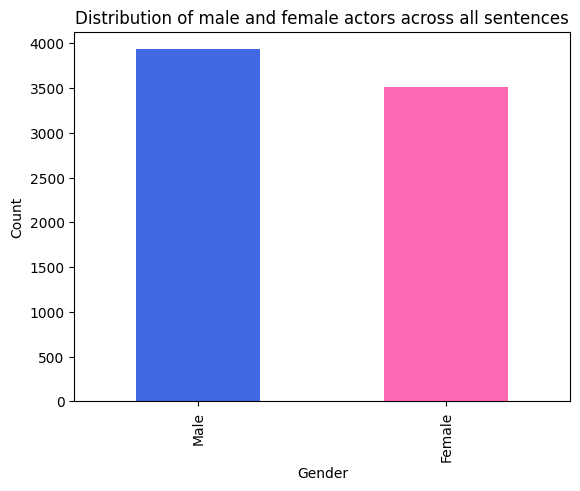

In [30]:
gender_counts = df['Gender'].value_counts()
colors = {'Male': 'royalblue', 'Female': 'hotpink'}
gender_counts.plot(kind='bar', color=[colors.get(gender, 'gray') for gender in gender_counts.index])
plt.ylabel('Count')
plt.title('Distribution of male and female actors across all sentences')
plt.show()

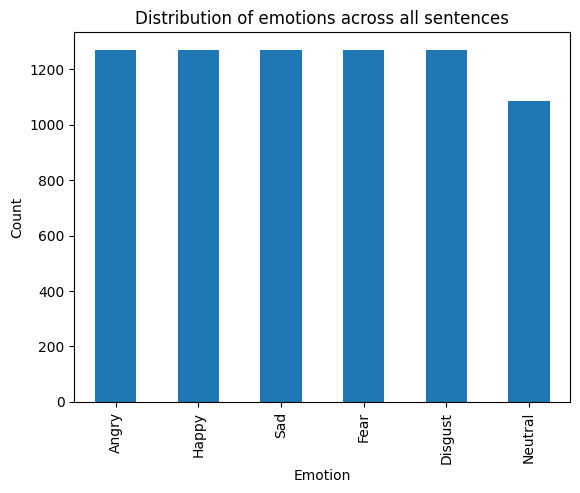

In [36]:
emotions_counts = df['Emotion'].value_counts()
emotion_mapping = {
    'ANG': 'Angry',
    'HAP': 'Happy',
    'SAD': 'Sad',
    'FEA': 'Fear',
    'DIS': 'Disgust',
    'NEU': 'Neutral'
}
emotions_counts = emotions_counts.rename(index=emotion_mapping)
emotions_counts.plot(kind='bar')
plt.ylabel('Count')
plt.title('Distribution of emotions across all sentences')
plt.show()